# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis.  I'm a novice in data analysis. I'm interested in the video games, mobility, culture, and content industry. I hope to become a data scientist with anomaly detection and anti-cheating. I hope that my analysis will have a positive impact on the world at least a little bit.  

This is my first Kaggle-data analyzing project on my own. I played(?) with this data for almost a month or more freely, and I finish it to start to answer these questions partially. Finally, I can close the analysis joyfully.
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  
_ps. English may seem a little awkward because it is not my first language. I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


##### **Contents list**
---
1. data remaking (dummy etc)
2. data distribution (all round veiwing)
3. questions : result, processing, add commentary(그외 추가 이야기 및 부족한 것 필요한 것 개선 방향)
4. what I analized with this dataset(my files)

## Importing Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

# import time as time

import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot

# visualization setting
plt.rcParams['axes.facecolor'] = 'white'

# import tensorflow as tf
# import keras

np.random.seed(0)
# tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
# print(tf.__version__)
# print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

# if you need
# !pip install joypy

0.11.2
1.4.1
1.22.4


In [2]:
df = data
df.head(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger
9,3,False,False,FutonBlewAway,100,Raider,46e56572ff6e403f45fac597240e13e9af225f06ca4e52...,4250334444,pleaGRC,40,NaN,SSF Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# 1. rankers by ladder
---
##### Q1. A total number of players in each division, usage of each class in descending order.

First I understood that question and wanted to know about each class ratio in each ladder. And it is true maybe.  
(But... I think this question has to be more clear about 'players'. Because there're quite many users who have multiple characters which are on ranked.)  

So I categorized the meaning of 'players' as characters and users. 

## 1-1. ids(characters) and users in each ladder
If we set the meaning of ‘players’ to ‘characters’, the number of unique ids would be the answer. Also, if we set the meaning of it to 'users', the number of unique accounts would be the answer.  
Each division has different numbers of ids(characters) and accounts, and there are some empty values among the 15000.

In [6]:
# id, rank, account unique numbers

modes = ['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']

for i in modes:
    print("* ladder:", i)
    print("  number of unique id:", df[df['ladder'] == i]['id'].nunique())
    print("  number of unique rank:", df[df['ladder'] == i]['rank'].nunique())
    print("  number of unique account:", df[df['ladder'] == i]['account'].nunique())
    print("  max value of the rank:", df[df['ladder'] == i]['rank'].max())
    if i != 'SSF Harbinger HC':
        print('---------------------------------')

* ladder: Harbinger
  number of unique id: 14918
  number of unique rank: 14918
  number of unique account: 13160
  max value of the rank: 15000
---------------------------------
* ladder: Hardcore Harbinger
  number of unique id: 14905
  number of unique rank: 14905
  number of unique account: 9020
  max value of the rank: 15000
---------------------------------
* ladder: SSF Harbinger
  number of unique id: 14981
  number of unique rank: 14981
  number of unique account: 10214
  max value of the rank: 15000
---------------------------------
* ladder: SSF Harbinger HC
  number of unique id: 14972
  number of unique rank: 14972
  number of unique account: 6374
  max value of the rank: 15000


## 1-2. characters numbers and ratios of each class in each ladder
We can all class and ladder mode put together in one data frame for analysis, and also make them separately to see more comfortably by descending order.  
First, we can compare the number of specific classes's `account` with other ladders easily.  

In [7]:
# 1. 
# pivot by class and ladder to one Data frame

df_acc_bylad = df.pivot_table(values = 'account', index = 'ladder', columns = 'class', aggfunc = lambda x: len(x.unique()), margins=True, margins_name="total", fill_value = 0)

# transpose to make class as row
df_acc_bylad = df_acc_bylad.sort_values(ascending = False, by = 'ladder').transpose()
df_acc_bylad.reset_index(drop = False, inplace = True)

# drop 'index = 26 'total' row '
df_acc_bylad.drop(index = 26, inplace = True)
df_acc_bylad

ladder,class,total,SSF Harbinger HC,SSF Harbinger,Hardcore Harbinger,Harbinger
0,Ascendant,3278,613,941,1005,733
1,Assassin,616,170,270,70,108
2,Berserker,7813,1235,2107,1854,2692
3,Champion,1127,291,260,458,126
4,Chieftain,1964,594,449,638,291
5,Deadeye,658,151,278,155,78
6,Duelist,60,50,10,0,0
7,Elementalist,1235,361,532,151,193
8,Gladiator,4227,1149,1288,1205,648
9,Guardian,1094,83,66,603,348


## 1-3. Answer: characters numbers/ratio of each class in each ladder (descending order)
In the second method, we can compare the number of specific classes's `id` by ladder.

In [8]:
# 2. 
# if you want to see ids seperated by ladder

# Harbinger
s1 = df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)
s2 = df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'Harbinger'].shape[0] * 100
tmpdf = pd.DataFrame(columns = ['numbers', 'ratio'])
tmpdf['numbers'], tmpdf['ratio'] = s1, s2
tmpdf

,numbers,ratio
class,,
Pathfinder,3428,22.98
Berserker,2713,18.19
Raider,1943,13.02
Slayer,1706,11.44
Necromancer,1207,8.09
Ascendant,740,4.96
Gladiator,648,4.34
Inquisitor,559,3.75
Guardian,349,2.34


In [9]:
# Harbinger HC

s1 = df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)
s2 = df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'Hardcore Harbinger'].shape[0] * 100
tmpdf = pd.DataFrame(columns = ['numbers', 'ratio'])
tmpdf['numbers'], tmpdf['ratio'] = s1, s2
tmpdf

,numbers,ratio
class,,
Necromancer,2099,14.08
Berserker,2064,13.85
Gladiator,1356,9.10
Slayer,1343,9.01
Ascendant,1149,7.71
Raider,895,6.00
Trickster,834,5.60
Inquisitor,828,5.56
Chieftain,690,4.63


In [10]:
# SSF Harbinger 

s1 = df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)
s2 = df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'SSF Harbinger'].shape[0] * 100
tmpdf = pd.DataFrame(columns = ['numbers', 'ratio'])
tmpdf['numbers'], tmpdf['ratio'] = s1, s2
tmpdf

,numbers,ratio
class,,
Berserker,2290,15.29
Necromancer,1716,11.45
Raider,1486,9.92
Gladiator,1320,8.81
Slayer,1301,8.68
Ascendant,1000,6.68
Trickster,955,6.37
Inquisitor,952,6.35
Hierophant,557,3.72


In [11]:
# SSF Harbinger HC

s1 = df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False)
s2 = df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'SSF Harbinger HC'].shape[0] * 100
tmpdf = pd.DataFrame(columns = ['numbers', 'ratio'])
tmpdf['numbers'], tmpdf['ratio'] = s1, s2
tmpdf

,numbers,ratio
class,,
Necromancer,2055,13.73
Berserker,1644,10.98
Gladiator,1576,10.53
Slayer,1135,7.58
Trickster,1058,7.07
Inquisitor,1052,7.03
Ascendant,865,5.78
Raider,826,5.52
Juggernaut,734,4.90


## 1-4. Visualization

### 1-4-1. Characters number of each class in each division separately

In [12]:
df_cha_bylad = df.pivot_table(values = 'id', index = 'ladder', columns = 'class', aggfunc = 'count', margins=True, margins_name="total", fill_value = 0)

# transpose to make class as row
df_cha_bylad = df_cha_bylad.sort_values(ascending = False, by = 'ladder').transpose()
df_cha_bylad.reset_index(drop = False, inplace = True)

# drop 'index = 26 'total' row '
df_cha_bylad.drop(index = 26, inplace = True)
df_cha_bylad.head(3)

ladder,class,total,SSF Harbinger HC,SSF Harbinger,Hardcore Harbinger,Harbinger
0,Ascendant,3754,865,1000,1149,740
1,Assassin,679,225,274,72,108
2,Berserker,8711,1644,2290,2064,2713


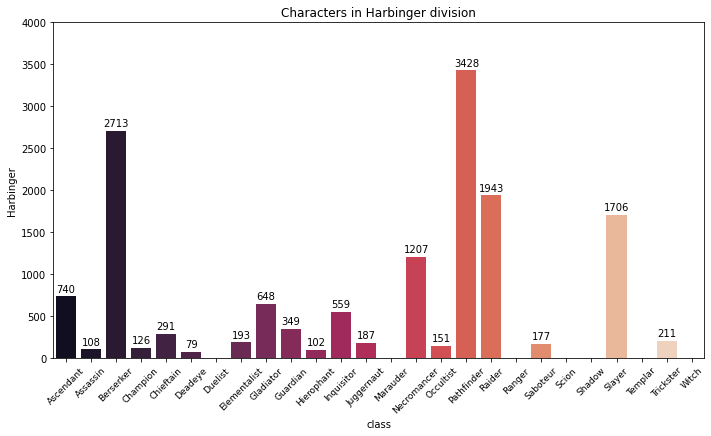

In [13]:
# if you want to see 'characters' number as seperated by ladder (case when 'Harbinger')

plt.subplots(figsize = (10, 6))

plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom=0, top=4000)
plt.xticks(rotation=45, fontsize=9)

ax = sns.barplot(x = 'class', y = 'Harbinger', data = df_cha_bylad, palette = "rocket")
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
plt.tight_layout()
plt.title('Characters in Harbinger division')
plt.show()

In [14]:
# # if you want to see 'characters' number as seperated by ladder, others 


# # Hardcore Harbinger 
# plt.subplots(figsize = (10, 6))

# plt.xlabel('Class name')
# plt.ylabel('Number of id')
# plt.ylim(bottom=0, top=4000)
# plt.xticks(rotation=45, fontsize=9)

# ax = sns.barplot(x = 'class', y = 'Hardcore Harbinger', data = df_cha_bylad, palette = "rocket")
# for p in ax.patches: 
#     ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
#        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
#        textcoords='offset points') 
# plt.tight_layout()
# plt.title('Characters in Hardcore Harbinger division')
# plt.show()


# # SSF Harbinger 
# plt.subplots(figsize = (10, 6))

# plt.xlabel('Class name')
# plt.ylabel('Number of id')
# plt.ylim(bottom=0, top=4000)
# plt.xticks(rotation=45, fontsize=9)

# ax = sns.barplot(x = 'class', y = 'SSF Harbinger', data = df_cha_bylad, palette = "rocket")
# for p in ax.patches: 
#     ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
#        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
#        textcoords='offset points') 
# plt.tight_layout()
# plt.title('Characters in SSF Harbinger division')
# plt.show()


# # SSF Hardcore Harbinger 
# plt.subplots(figsize = (10, 6))

# plt.xlabel('Class name')
# plt.ylabel('Number of id')
# plt.ylim(bottom=0, top=4000)
# plt.xticks(rotation=45, fontsize=9)

# ax = sns.barplot(x = 'class', y = 'SSF Harbinger HC', data = df_cha_bylad, palette = "rocket")
# for p in ax.patches: 
#     ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
#        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
#        textcoords='offset points') 
# plt.tight_layout()
# plt.title('Characters in SSF Hardcore Harbinger division')
# plt.show()

### 1-4-2. Characters number by division and class 
without number texts.

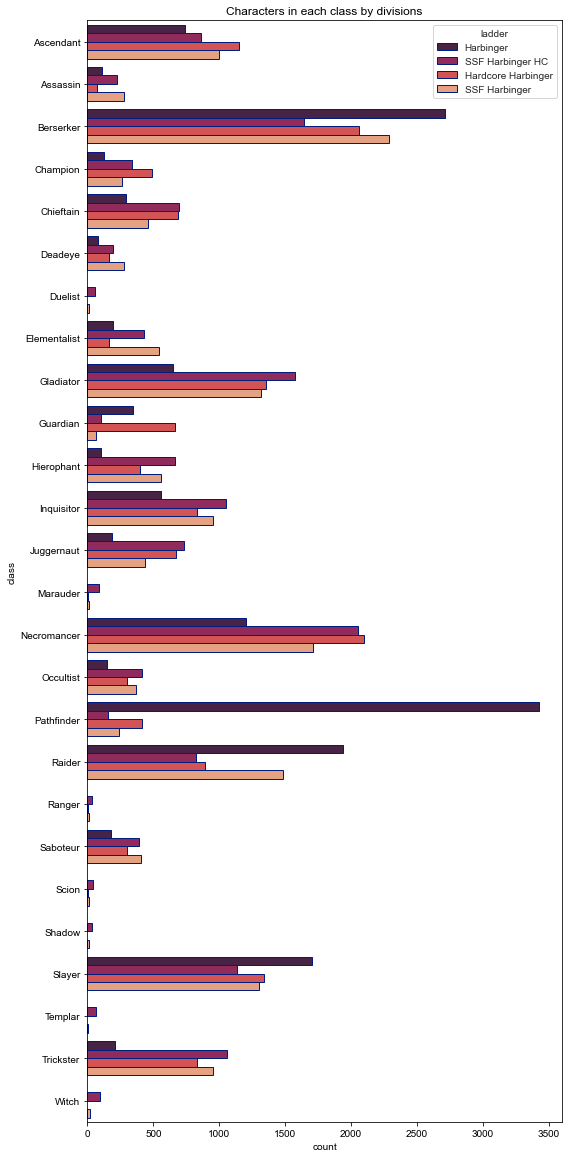

In [15]:
# if you want to see all of them

orderlist = list(df_cha_bylad['class'])

plt.rcParams["figure.figsize"] = (8, 16)
plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom = 0, top = 4000)
plt.xticks(rotation=0, fontsize=10)
sns.set_style('whitegrid')
ax = sns.countplot(data = df, y = 'class',
              palette="rocket", edgecolor = sns.color_palette("dark", 1), hue = 'ladder', order = orderlist) 
plt.tight_layout()
plt.title('Characters in each class by divisions')
plt.show()

## 1-5. Conclusion:
We checked the specific number needed. And there are some preferred classes in each ladder.  

In Harbinger, the most common mode, Pathfinder is the most one.  
And Necromancer is the most preferred in Harbinger hardcore mode. (Berserk was on the same level.)  
In SSF Harbinger, the solo mode, the most picked one is Berserker and Necromancer is also preferred too.  
In SSF Harbinger hardcore, the most one is Necromancer and Berserker is also preferred.  

- Necromancer or Berserker are preferred in some modes, but Pathfinder is the most preferred class, only in Harbinger mode.  
- And we may have to consider that all of them(Necromancer and Berserker and Pathfinder) are one-stat classes later. (Each class is among the Intelligence, Strength, and Dexterity stat.)  

◎ As a result, you can find the preferred class in each mode and find out 'the imbalance in performance between classes' or 'the advantageous skills in certain modes' to see if there is a problem with game balance.

# 2. Are streamers better or not?
---
##### Q2. Some of the players streaming their games (twitch column). Do they play better than people who do not stream?

**Before analyzing, I gave shape to the question. This was important to solve this question especially because the ‘better play’ meaning is a little ambiguous.**

1. We have to set the standard of 'play better' means, so I treat the rank of characters to the 'better play'. Maybe there are more criteria like ranking of 'exp' or 'level', 'challenge' contrasts.  
    But I just used the **rank** because they are ranked players, they are already skilled enough to not need to base their rankings on the number of challenges or levels. In addition, there are many variables that affect classes, parties, items, and skill trees to compare the players. And each mode has a different environment. On other criteria other than game modes, we cannot know and use everything in detail.  

2. And there are some cases where one twitch streamer has multiple accounts or characters. And also, one user has multiple characters on a rank chart. (I discovered it when I analyze the dataset before this project.) So I assumed that one account or one twitch id means one user(the one twitch ‘player’ has multiple accounts or characters or the one ‘player’ has multiple characters).  

3. And there're some missing rank values in each ladder. (When I analyzed the data personally, I substituted the missing data by updating it to rank only the data we have. But,) anyway, I used the original rank in this analysis.  

4. Plus, And I decided to use rank, but how should we decide the ability(rank) to represent one user? My words mean, which one is more accurate, the rank average or median of several characters a user has. I thought it would be ideal if the number of data in a user's ranking was more than 30. But the reality wasn't, so we used both for this analysis.  

5. sequence
    1. normally get the average from all dataframe
    2. get the average from each player(user)'s average rank and compare
    3. get the average from each player(user)'s median rank and compare
    4. statistical significance test (Mann Whitney U test)

In [16]:
df['twitch'].describe()

count                16300
unique                9613
top       thespunkylobster
freq                    18
Name: twitch, dtype: object

In [17]:
# Not streaming users
df[df['twitch'].isna() == True].describe(include = 'object')

,name,class,id,account,twitch,ladder
count,43476,43476,43476,43476,0,43476
unique,42342,26,43476,27505,0,4
top,_Flic_,Berserker,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,chuz101,NaN,SSF Harbinger
freq,14,6372,1,30,NaN,12320


In [18]:
# Twitch streaming users
df[df['twitch'].isna() == False].describe(include = 'object')

,name,class,id,account,twitch,ladder
count,16300,16300,16300,16300,16300,16300
unique,15946,26,16300,9618,9613,4
top,Cya,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,TheSpunkyLobster,thespunkylobster,Hardcore Harbinger
freq,8,2339,1,18,18,5452


In [19]:
# you can see how much missing values in rank are there by ladder

print(df[df['ladder'] == 'Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'Hardcore Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'SSF Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'SSF Harbinger HC']['rank'].nunique())

14918
14905
14981
14972


### dividing data

Let's divide the dataset as whether 'twitch' user or not.  
And divide them by person(twitch unique value is first in the twitch column)'s average.  


In [20]:
# Let's divide the dataset as whether 'twitch' column is null or not

# each id's rank
df_twt = df[df['twitch'].isna() == False]
df_twt_non = df[df['twitch'].isna() == True]

# each user's mean rank
# grouping by player and get the 'average' rank of each player streaming on twitch or not
df_twt_mean = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'mean')
df_twt_non_mean = df_twt_non.pivot_table(index = 'account', values = 'rank', aggfunc = 'mean')

# each user's median rank
# grouping by player and get the 'median' rank of each player streaming on twitch or not
df_twt_med = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'median')
df_twt_non_med = df_twt_non.pivot_table(index = 'account', values = 'rank', aggfunc = 'median')

## 2-1. normal average and median of rank simply

normally get the average and median from all dataframe, and checking standard deviation

In [21]:
# twtich streamers and not streaming users's rank 'average' of each 'id'
print(df_twt['rank'].mean())
print(df_twt_non['rank'].mean())

7101.554355828221
7643.018308952065


In [22]:
# twtich streamers and not streaming users's rank 'median' of each 'id'
print(df_twt['rank'].median())
print(df_twt_non['rank'].median())

6960.5
7684.0


It seems that the rank of users who stream is about 500 higher.  
Considering the total ranking is 15,000, the difference of 500 is about one-thirty, so it's not a small difference, but it doesn't seem to be a very big difference.  
And the median showed a bigger difference. 

In [23]:
# check the standard deviation

print("All users rank : \n", df['rank'].std())
print("Streaming users rank : \n", df_twt['rank'].std())
print("Not-streaming users rank : \n", df_twt_non['rank'].std())

All users rank : 
 4330.179897702609
Streaming users rank : 
 4393.701617302437
Not-streaming users rank : 
 4296.88083653341


## 2-2. average by account (when we set the average to a representative value)

Get the average values from each player(user)'s average rank. And check the average and median of them.

In [24]:
# example of users' rank average.
# grouping by twitch and get average 'rank' of each player streaming on twitch
df_twt_mean.sample(5)

,rank
twitch,
alaskasworld,"8,700.00"
tman0112,"14,909.00"
xanity_poe,"11,520.00"
icy_veinz,"5,704.50"
cengaaver,"7,397.00"


In [25]:
# grouping by twitch and get average 'rank' of each non_streaming players
df_twt_mean.sample(5)

,rank
twitch,
bludstained,"11,289.00"
theduocsi,"4,838.00"
artymiss,"7,664.67"
moscorpion,"1,933.00"
sh1nrax,"8,921.00"


In [26]:
# get the average of each player's average rank
print(df_twt_mean['rank'].mean())
print(df_twt_non_mean['rank'].mean())

7479.202758592788
7966.844983149482


In [27]:
# get the median of each player's average rank
print(df_twt_mean['rank'].median())
print(df_twt_non_mean['rank'].median())

7425.0
8037.0


## 2-3. median rank of each player and get average(when we set the median to a representative value)

Get the average from each player(user)'s median rank

In [28]:
# example of users' rank median.
# grouping by twitch and get median 'rank' of each player streaming on twitch
df_twt_med.sample(5)

,rank
twitch,
twitchaccoutforsmite,"12,043.00"
y2k32,"4,009.00"
shock268,"3,627.00"
lagmastersam,"10,121.50"
thorloph,"12,150.50"


In [29]:
# grouping by twitch and get median 'rank' of each non_streaming players
df_twt_non_med.sample(5)

,rank
account,
v1rus66,"7,237.00"
flieskiller,"8,374.00"
Olympus1111,"3,269.00"
Sevenzera,"11,850.00"
NjNoLoVe_,"14,032.00"


In [30]:
# get the average of each player's median rank
print(df_twt_med['rank'].mean())
print(df_twt_non_med['rank'].mean())

7435.413606574431
7939.01946918742


In [31]:
# get the median of each player's median rank
print(df_twt_med['rank'].median())
print(df_twt_non_med['rank'].median())

7395.5
8039.5


## 2-4. Visualizing each value
For convenience, I will call a user who does not stream as a 'normal' user.  

(Because we visualize 'rank (sparse information)' not 'count(volume in each level)' so I thought we shouldn't use violin or box plot.)  

In [32]:
dset = [df_twt['rank'], df_twt_non['rank'], 
                   df_twt_mean['rank'], df_twt_non_mean['rank'], 
                   df_twt_med['rank'], df_twt_non_med['rank']]

x = ['Arithmetic mean - All Twitch_user', 'Arithmetic mean - All normal_user', 
     'Mean of rank average - Twitch_user', 'Mean of rank average - ormal_user', 
     'Mean of rank median - Twitch_user', 'Mean of rank median - normal_user']

y = [x.mean() for x in dset]

print(y)

[7101.554355828221, 7643.018308952065, 7479.202758592788, 7966.844983149482, 7435.413606574431, 7939.01946918742]


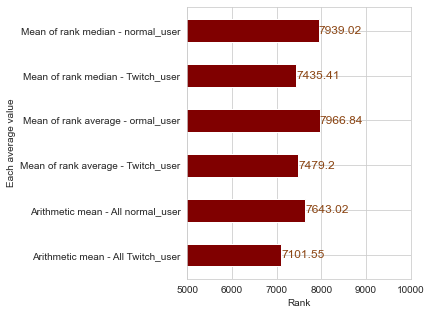

In [33]:
# Visualization 1

plt.figure(figsize = (4,5))

plt.ylabel('Each average value')
plt.xlabel('Rank')
plt.barh(x, y, height = 0.5, color = 'maroon')
plt.xlim(left = 5000, right = 10000)

for i, v in enumerate(x):
    plt.text(y[i], v, round(y[i],2), fontsize = 12, color = 'saddlebrown',
             horizontalalignment = 'left', verticalalignment = 'center')

# plt.tight_layout
plt.show()

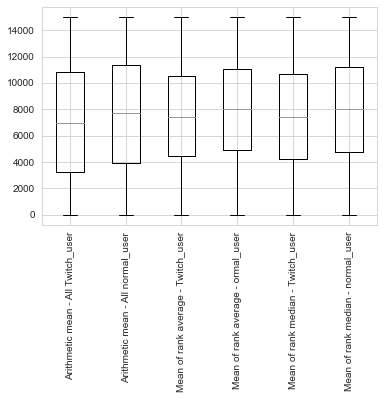

In [34]:
# Visualization 2

# from matplotlib import pyplot as plt
# plt.rcParams["font.family"] = 'AppleGothic'
# plt.rcParams["font.size"] = 10
# plt.rcParams["figure.figsize"] = (6, 4)
# plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize = (6,4))
plt.boxplot([df_twt['rank'], df_twt_non['rank'], 
             df_twt_mean['rank'], df_twt_non_mean['rank'],
            df_twt_med['rank'], df_twt_non_med['rank']])  
plt.xticks(range(1,7), x, rotation = 90)
# plt.rotation(90)
plt.show()

## 2-5. Mann Whitney U test: Statistical significance

The T-test is a test about a statistical comparison of the means of two independent samples, as you know. But these are rank scales, so it's hard to treat this data as a normal t-test case. (Of course, it's hard to say that the simple process of calculating the mean and median ‘absolutely’ doesn’t have a problem…) So I decided to use Mann Whitney U Test, which is a nonparametric method.

*I don't think the statistical significance is not significant for this, especially with little size data. The data size is so little so we can't discuss Gaussian distribution or etc. But I think it's meaningful just to check even if it's not used somewhere.*

What I was wondering about was which one I have to use among these to reach a conclusion, `df_twt`, `df_twt_mean`, `df_twt_med`. They have each problem with themselves.

1. First, I think the `df_twt` and `df_twt_non` have a critical problem in that there are multiple characters a single user has. It can't be a real answer to the meaning(intention) of question.
2. Second, in case of `df_twt_mean`, there is also a problem with the average rank by each player (not one character, but a user). It's also questionable that the average itself represents the user, which makes it easier to conflict with the concept of average because it's a rank, not a score.
3. Third, in case of `df_twt_med`, I think the median is not bad because it is ‘real’ value. But there’s also a problem. There is a tendency to add or subtract the existence of other details.

After much consideration, I used the second one(**average of each player,** `df_twt_mean`, `df_twt_non_mean`) but, I would be grateful if I can get advice about this. 😚 😚  

### 2-5-1. Normality test and equal-variance checking

In [37]:
dset = [df_twt['rank'], df_twt_non['rank'], 
       df_twt_mean['rank'], df_twt_non_mean['rank'], 
       df_twt_med['rank'], df_twt_non_med['rank']]

print('=== Normal-test ===')
for i in dset:
    res1 = scipy.stats.normaltest(i)
    print(res1)

print('\n')
print('=== Equal-variance test ===')
print('df_twt, df_twt_non : ', scipy.stats.levene(dset[0], dset[1]))
print('df_twt_mean, df_twt_non_mean : ', scipy.stats.levene(dset[2], dset[3]))
print('df_twt_med, df_twt_non_med : ', scipy.stats.levene(dset[4], dset[5]))

=== Normal-test ===
NormaltestResult(statistic=15184.917059323941, pvalue=0.0)
NormaltestResult(statistic=35616.792932991775, pvalue=0.0)
NormaltestResult(statistic=1650.4297634961301, pvalue=0.0)
NormaltestResult(statistic=5194.1758451258065, pvalue=0.0)
NormaltestResult(statistic=2480.360153393761, pvalue=0.0)
NormaltestResult(statistic=6986.082210562436, pvalue=0.0)


=== Equal-variance test ===
df_twt, df_twt_non :  LeveneResult(statistic=22.271981900489976, pvalue=2.3716901628493167e-06)
df_twt_mean, df_twt_non_mean :  LeveneResult(statistic=0.025778844642800065, pvalue=0.8724424761073863)
df_twt_med, df_twt_non_med :  LeveneResult(statistic=1.3316344430604279, pvalue=0.24852208704901815)


### 2-5-2. Mann-Whitney U Test

In [38]:
# Just all data divided twitch column
scipy.stats.mannwhitneyu(x = dset[0], y = dset[1], alternative = 'two-sided', method = 'auto')

MannwhitneyuResult(statistic=328742306.5, pvalue=3.113355095773994e-42)

And I addedd the T-test with mean dataset and median dataset, because they are composed by represetative values.

In [39]:
# (when we set the average to a representative value)
scipy.stats.mannwhitneyu(x = dset[2], y = dset[3], alternative = 'two-sided', method = 'auto')

MannwhitneyuResult(statistic=122721825.5, pvalue=1.0278489248560867e-25)

In [40]:
scipy.stats.ttest_ind(a = dset[2], b = dset[3], equal_var = False, permutations = 0)

Ttest_indResult(statistic=-10.563785576496528, pvalue=5.294341099747472e-26)

In [41]:
# (when we set the median to a representative value)
scipy.stats.mannwhitneyu(x = dset[4], y = dset[5], alternative = 'two-sided', method = 'auto')

MannwhitneyuResult(statistic=122663963.5, pvalue=5.213641179682086e-26)

In [42]:
scipy.stats.ttest_ind(a = dset[4], b = dset[5], equal_var = False, permutations = 0)

Ttest_indResult(statistic=-10.658987259579916, pvalue=1.926325123676089e-26)

All p-values are smaller than 0.05, so we can say that 'there's no basis to consider that there are no differences between Twitch streamers and normal players.'.  

Interestingly, there is little difference in statistics in each t-test, whether using means or media. I think it is reasonable to say that whatever we use as a representative value is not very effective in this question.  


### 2-5-3. Confidence interval 
I attach the confidence interval together. We can imagine from this, "What numbers(rank) are mainly distributed in each group".

_code reference: https://jae-eun-ai.tistory.com/48_

In [43]:
from numpy import array, mean
from scipy.stats import sem, t
def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * array(data)
    n = len(a)
    m,se = mean(a),sem(a)
    h = se*t._ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h

# dset = [df_twt['rank'], df_twt_non['rank'], 
#        df_twt_mean['rank'], df_twt_non_mean['rank'], 
#        df_twt_med['rank'], df_twt_non_med['rank']]

llist = []
for i in dset:
    j = mean_confidence_interval(i)
    llist.append(j)

In [44]:
df_ci = pd.DataFrame(data = llist)
df_ci = df_ci.T
df_ci.columns = ['twt', 'twt_non', 'twt_mean', 'twt_non_mean', 'twt_median', 'twt_non_median']
df_ci.index = ['m', 'm-h', 'm+h']
df_ci

,twt,twt_non,twt_mean,twt_non_mean,twt_median,twt_non_median
m,"7,101.55","7,643.02","7,479.20","7,966.84","7,435.41","7,939.02"
m-h,"7,034.10","7,602.63","7,401.28","7,920.86","7,355.51","7,892.20"
m+h,"7,169.01","7,683.41","7,557.13","8,012.83","7,515.32","7,985.84"


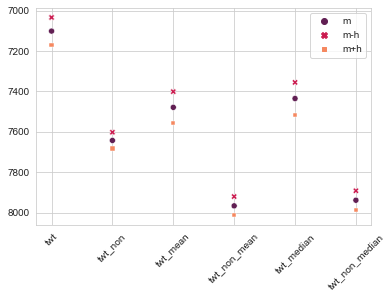

In [48]:
plt.figure(figsize = (6,4))
sns.scatterplot(data = df_ci.T, palette = 'rocket')
plt.xticks(rotation = 45)
plt.gca().invert_yaxis()  # reverse the y axis!
plt.show()

## 2-6. Conclusion: Answer is "Well...Yes but..."

*I don't know how to make it better. I think it would be better if I could improve my ability to name 'variables'. XD*

The conclusion is 'YES'.
We could compare their average rank of them by various methods. There's a difference obviously between the Twitch streamers and the non-streaming players.

**But! I want to make sure. If you compare the ability of both streaming and non-streaming ‘rankers’, you can see that the former is a little better, except for the "ranker" condition, we will get completely different results. Because it's not a data that can be generalized to the entire user.**

So I'd like to say 'no'. Simply say, streaming and skills are not necessary and sufficient conditions. *It's not about the p-value. It must need bigger or more detailed data if we discuss this, I think.)*  

### Improvement Direction

- (This is the same context we talked about before analyzing this question.) Existing data can define and analyze something new that can index 'ability(or skill)' based on whether `rank` is higher than `challenge` or experience.
    
    However, since this is ‘character’-specific information, we can discuss at last whether there is a more accurate difference if we find a way to create an indicator with all the accounts they have. (if we do this, we must have identified information with a person and the accounts that he has.)
    
- Since ‘streaming’ is not necessarily only for users who are good at playing, it would be better to analyze users first by selecting the streamers in the Path Of Exile category within Twitch, for giving an insight to us.

#  X - 3. A case when we were Necromancer
---
##### Q3. Predict the chance to be in the top 30 in each division, if we are Necromancer. With and without stream.

Actually, I don't know exactly what 'stream' means, but I think it would be twitch streaming. So, I define it as all Necromancer characters and Necromancer characters with twitch streaming.  
In this case, we can think of the question like this:  
    1. simply get the percentage of Necromancer in the top 30 by ladder 
    2. get the percentage of Necromancers in the top 30 among the same classes by ladder
    2. make a model with 'rank', 'class', 'ladder', 'twitch' columns and predict.
 

##### Before the analysis, I should clarify this thing, meaning of each analysis (get numbers). This is very important I think.
I thought about these things partially, what we can do with data, how, and the meaning of it, and the flaws.  
I used the word 'hypothesis', which means when we use specific methods(values) for solving the problem correctly.  

> In `3-1`, I got a percentage between classes in the top 30 characters.  
This is just the percentage of classes in the top 30.  
It means, we can answer what classes are in the top 30.  
When we use this one, we need a hypothesis; we're so good that we can compete with the top 30 characters and out of the top 30 characters are no match for us. It's like a setting of a **competition between classes in the top 30**.  
And I think when we use this, it's necessary for comparing the percentage of classes, in the top 30 ranks and around all ranks.  

> I think top30 means pilots' league who is really good playing.  
So in `3-2-1`, I got a percentage of the top 30 Necromancers among 'all Necromancers'.  
This is divided top 30 Necromancers numbers by all Necromancers numbers.  
It means, we can answer how many characters are playing best among all Necromancers.  
In other words, when the number of characters in each job is the same, you can see how many top rankers there are in each job.
And in other classes, I got the same ratio (`3-2-3`).  
Because of the reason that each class has a different number of rankers so we can't simply compare like `3-1`. In the case of the question, I think we should compare the case of 'choice of class', rather than just the top 30.  
The problem is, that this case needs a hypothesis; **all the classes have the same performance** and all of the pilots are almost equal in ability. (I was sure that everyone felt that this question assumed that all pilots are almost equally good at it.)   
Furthermore, it is seriously affected by character numbers who are out of the rank 30.  
I thought this method is most appropriate for the question and the probability can be drawn by comparing each percentage of classes.  
Thus this method isn't perfect also, for solving the problem.  

> In `3-2-2`, I got the percentage of the top 30 Necromancers among 'all characters'.  
This is divided top 30 Necromancers numbers by all Necromancers numbers.  
It means, we can answer how much Necromancer characters are playing best in all characters.  
It seems worth it. But this method allows us to know **the best Necromancer percentages** except for comparison problems.  
I think it's not appropriate to solve a problem on the assumption that 'if' we are a necromancer.  
It needs a hypothesis; 
 
 
##### Before the steps, check the 'rank' column whether it includes null or not in 30. 

In [ ]:
# check the rank number in each ladder whether there is a null or not. 

df[df['rank']<=30].groupby('ladder')['rank'].nunique()

## 3-1. Let's see what classes in top 30 and thier rate.

In [ ]:
# in top 30 classes number 

df[df['rank'] <=30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id']

### Percentage between classes in the top 30 characters

In [ ]:
# in top 30 classes ratio 

df[df['rank'] <=30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30*100

### visualization to pie chart (graph 3-1)

In [ ]:
# make for repeatation for visualization
df_30pi = df[df['rank'] <=30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30*100
# ratio list making : each ladder
ratio_list = []
for i in list(df_30pi.columns):
    ratio = df_30pi[i]
    ratio_list.append(ratio)

# use ratio and labels to plt code
labels = df_30pi.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
fig, ax = plt.subplots(2, 2, squeeze=True, figsize = (12, 12))
plt.subplot(2,2,1)
plt.pie(ratio_list[0], labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,2)
plt.pie(ratio_list[1], labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,3)
plt.pie(ratio_list[2], labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,4)
plt.pie(ratio_list[3], labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)

# set the each pie chart title
ax[0, 0].set_title("{} mode".format(list(df_30pi.columns)[0]))
ax[0, 1].set_title("{} mode".format(list(df_30pi.columns)[1]))
ax[1, 0].set_title("{} mode".format(list(df_30pi.columns)[2]))
ax[1, 1].set_title("{} mode".format(list(df_30pi.columns)[3]))
fig.tight_layout()
plt.axis('equal')
plt.show()

This poor chart took a quite long time. I wanted to delete the 0% (don't need information) classes but...

Necromancers take 20% in the top 30 except SSF Harbinger HC mode.  
In SSF Harbinger HC mode, Necromancers take 36.67% in the top 30. 


## 3-2. not care of stream 
---

### the Necromancers (graph 3-2)

In [ ]:
# define

df_Nec = df[(df['class'] == 'Necromancer')]
df_Nec30 = df_Nec[df_Nec['rank']<=30]

In [ ]:
# Necromancers rank boxplot by ladder 

plt.figure(figsize=(4,6))
plt.xticks(rotation=45, fontsize=10)
sns.boxplot(data = df_Nec, x = 'ladder', y = 'rank')

In [ ]:
# All Necromancers number by ladder

df_Nec.groupby('ladder')['id'].count()

In [ ]:
# Necromancers number Who are in top 30 by ladder

df_Nec30.groupby('ladder')['id'].count()

And make sure there is no problem with `df_Nec30`.

In [ ]:
# Necromancers Who are in top 30 by ladder unique values

df_Nec30.groupby(by = 'ladder').nunique()

### 3-2-1. percentage of the top 30 Necromancer among 'the all Necromancers'

In [ ]:
# Necromancers Who are in top 30 among all Necromancers by ladder

df_Nec30.groupby('ladder')['id'].count() / df_Nec.groupby('ladder')['id'].count() * 100

### 3-2-2. percentage of the top 30 Necromancer among 'the all characters'

In [ ]:
# Necromancers who are in top 30 among all characters by ladder

df_Nec30.groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count() * 100

In [ ]:
type(df_Nec30.groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count() * 100)

### 3-2-3 percentage of each class's top 30 characters among each class (graph 3-3)
" classes who are in top 30 among all class-itself by ladder "

If you select a particular class, what is the probability that the particular class will be in the top 30?  
I want to get the number of 'the class' in the top 30 and the number of all 'the classes'. (like 3-2-1.)

In [ ]:
# classes who are in top 30 among each classes by ladder
# we exceptd the classes what is not in top30

classes = list(df[df['rank'] <= 30]['class'].unique())

for i in classes:
    df_bin = df[df['class'] == i]
    df_bin30 = df_bin[df_bin['rank']<=30]
    ser = df_bin30.groupby('ladder')['id'].count() / df_bin.groupby('ladder')['id'].count() * 100
    print("# {} : top 30 ratio(%) in each class by ladder".format(i))
    print(ser)
    print("==========================================")
    if i == classes[0]:
        ser1 = ser
    elif i == classes[1]:
        ser2 = ser
        concatingdf = pd.concat([ser1, ser2], axis=1, ignore_index=True)
    else:
        ser2 = ser
        concatingdf = pd.concat([concatingdf, ser2], axis=1, ignore_index=True)

In [ ]:
concatingdf.columns

And the `concatingdf`, which was made during running the 'for'repeatation, has each class ratio, so we unbox this to a normal data frame.

Then, rename the columns by listing` classes`.   

_Of course, there is a more simple solution with rename, I know, but I made the code for `dictionary`.  
I have to practice repeating comprehension and usage for later._


In [33]:
# reset index and rename with a dictionary what we made
concatingdf.reset_index(drop = False, inplace = True)

dictionary = dict()
for i in range(0, 18):
    dictionary[i] = classes[i]

concatingdf.rename(columns = dictionary, inplace = True)
concatingdf

NameError: name 'concatingdf' is not defined

In [ ]:
# and transpose the dataframe to look good.

top30cla = concatingdf.transpose()
top30cla.reset_index(drop = False, inplace = True)
top30cla.rename(columns = top30cla.iloc[0], inplace = True)
top30cla = top30cla.drop(top30cla.index[0])
top30cla.reset_index(drop = True, inplace = True)
top30cla.rename(columns = {'ladder':'class'}, inplace = True)
top30cla

In [ ]:
# visualization (graph 3-3)
# There's some null so I had to each ladder partialy

# percentage list making : each ladde
Har_top30 = top30cla[top30cla['Harbinger'].isna() == False][['class', 'Harbinger']]
HarHC_top30 = top30cla[top30cla['Hardcore Harbinger'].isna() == False][['class', 'Hardcore Harbinger']]
SSFHar_top30 = top30cla[top30cla['SSF Harbinger'].isna() == False][['class', 'SSF Harbinger']]
SSFHarHC_top30 = top30cla[top30cla['SSF Harbinger HC'].isna() == False][['class', 'SSF Harbinger HC']]

# use percentages and labels to plt code
# labels = top30cla.index
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
fig, ax = plt.subplots(2, 2, squeeze=True, figsize = (12, 12))
plt.subplot(2,2,1)
plt.pie(Har_top30['Harbinger'], labels=Har_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,2)
plt.pie(HarHC_top30['Hardcore Harbinger'], labels=HarHC_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,3)
plt.pie(SSFHar_top30['SSF Harbinger'], labels=SSFHar_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,4)
plt.pie(SSFHarHC_top30['SSF Harbinger HC'], labels=SSFHarHC_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)

# set the each pie chart title
ax[0, 0].set_title("{} mode".format(Har_top30.columns[1]))
ax[0, 1].set_title("{} mode".format(HarHC_top30.columns[1]))
ax[1, 0].set_title("{} mode".format(SSFHar_top30.columns[1]))
ax[1, 1].set_title("{} mode".format(SSFHarHC_top30.columns[1]))
fig.tight_layout()
plt.axis('equal')
plt.show()

I thought, then, this can be used for setting values to predict with machine learning.

## 3-3. care of stream
---
### distribution of streaming

How much is streaming involved in the rank? We have to think about the relationship between columns. 

I think we should be noted that broadcasting itself does not affect the rank.  
Just because he's on the streaming doesn't mean he's doing better.  
In other words, some people just stream, and many people don't broadcast games and just play them.

But the questioner wanna know regarding 'streaming' meaning.   
Since it is not expected to be directly related to the rank, I will check it with the correlation coefficient.  

In [34]:
# make a twitch column with streaming.

df['stream'] = np.where(df['twitch'].isna(), 0, 1)

In [35]:
# get the correlation

df.corr()

,rank,dead,online,level,experience,challenges,stream
rank,1.00,0.04,-0.04,-0.45,-0.43,-0.26,-0.06
dead,0.04,1.00,-0.09,-0.33,-0.31,-0.21,0.03
online,-0.04,-0.09,1.00,0.08,0.11,0.06,-0.01
level,-0.45,-0.33,0.08,1.00,0.92,0.60,0.10
experience,-0.43,-0.31,0.11,0.92,1.00,0.66,0.11
challenges,-0.26,-0.21,0.06,0.60,0.66,1.00,0.19
stream,-0.06,0.03,-0.01,0.10,0.11,0.19,1.00


<AxesSubplot:>

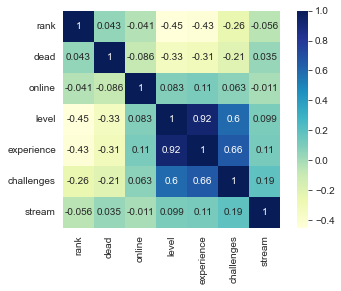

In [36]:
plt.rcParams["figure.figsize"] = (6, 4)
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", square = True)

It doesn't seem to have many relationships with it.  

So I get the numbers for the Necromancers, just like the above methods.

### the Necromancers who is streaming

In [37]:
# set dataframes of Necromancers who's twitch column is not null.

df_NecTw = df_Nec[df_Nec['twitch'].isnull()==False]
df_NecTw30 = df_NecTw[df_NecTw['rank']<=30]

NameError: name 'df_Nec' is not defined

In [ ]:
# Necromancers with stream rank boxplot by ladder

plt.figure(figsize=(4,6))
plt.xticks(rotation=45, fontsize=10)
sns.boxplot(data = df_NecTw, x = 'ladder', y = 'rank')

In [ ]:
# All Necromancers by ladder - with stream

df_NecTw.groupby('ladder')['id'].count()

In [ ]:
# Necromancers Who are in top 30 by ladder - with stream

df_NecTw30.groupby('ladder')['id'].count()

### 3-3-1. ratio the top 30 Necromancer(streaming) among 'the all Necromancers'

In [38]:
# Streaming Necromancers Who are in top 30 among all Necromancers by ladder

df_NecTw30.groupby('ladder')['id'].count() / df_Nec.groupby('ladder')['id'].count() * 100

NameError: name 'df_NecTw30' is not defined

### 3-3-2. ratio the top 30 Necromancer(streaming) among 'the all Necromancers(streaming)'

In [39]:
# Streaming Necromancers who are in top 30 among all streaming Necromancers by ladder

df_NecTw30.groupby('ladder')['id'].count() / df_NecTw.groupby('ladder')['id'].count() * 100

NameError: name 'df_NecTw30' is not defined

### 3-3-3. ratio the top 30 Necromancer(streaming) among 'the all characters'

In [40]:
# Streaming Necromancers who are in top 30 among all characters by ladder

df_NecTw30.groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count() * 100

NameError: name 'df_NecTw30' is not defined

### 3-3-4. ratio the top 30 Necromancers(streaming) among 'the all characters(streaming)'

In [41]:
# Streaming Necromancers who are in top 30 among all streaming characters by ladder

df_NecTw30.groupby('ladder')['id'].count() / df[df['twitch'].isna() != False].groupby('ladder')['id'].count() * 100

NameError: name 'df_NecTw30' is not defined

세 가지로 나누어 총 8가지로 보려고 한다. 물론 이 여부를 더미 변수 처리 해서 머신러닝을 돌릴 수도 있을 것 같긴 하다.

1. Tw 하는 혹은 안하는  
2. 전체 혹은 전체 NEC 중  
3. Tw 하는 혹은 안하는 (top 30인 NEC)

나눌 것.

### 3-3-5 ratio the top 30 of each streaming class among each class 
" streaming classes who are in top 30 among all class-itself by ladder "
